In [1]:
import glob as glob
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [107]:
%matplotlib ipympl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# settings for which files to parse
bIgnoreLeadingMisses = True
pitchCorrection = 20 # in degrees

# All participant data

In [678]:
# insert subject name here:
subject_name="*"
if bIgnoreLeadingMisses:
    graph_data_files = glob.glob('temp_data/no_leading_misses/OFD/'+subject_name+'*OFDvEcc.*')
else:
    graph_data_files = glob.glob('temp_data/all_leading_misses/OFD/'+subject_name+'*OFDvEcc.*')

In [682]:
# construct np data
yaws = np.array([])
pitches = np.array([])
OFDs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFDs = np.append(OFDs, graph_data_tuples[num_entries*i])
        eccs = np.append(eccs, graph_data_tuples[num_entries*i+1])
        responses_original = np.append(responses_original, graph_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, graph_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, graph_data_tuples[num_entries*i+4]*(180/np.pi))

# filter the data to remove outliers
eccOFD = np.vstack([OFDs, eccs]).T
OFD_max_filt = 5
ecc_max_filt = 100
time_idcs = eccOFD[:, 0] < OFD_max_filt
ecc_idcs = eccOFD[:, 1] < ecc_max_filt
valid = time_idcs * ecc_idcs
eccOFD = eccOFD[valid,:]
responses_filtered = responses_original[valid]

358 total stims, 283 hits, 75 misses


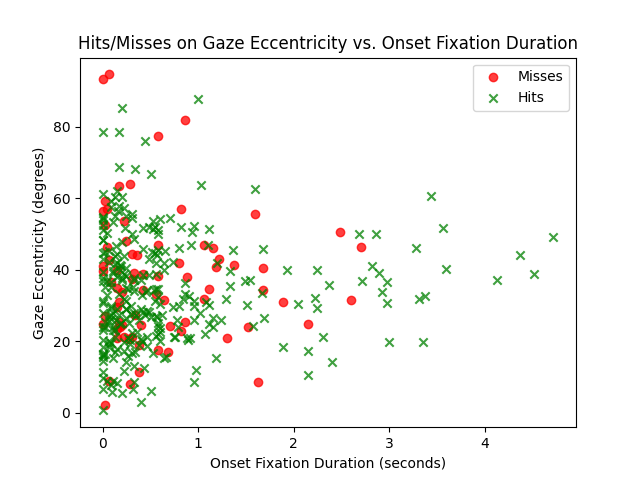

In [684]:
fig, ax = plt.subplots()

OFD = eccOFD[:,0]
eccentricity = eccOFD[:,1]

ecc2 = np.linalg.norm([(pitches-20)*2.5, yaws], axis=0)[valid]
color = ['r' if response else 'g' for response in responses_filtered]

misses = responses_filtered.astype(bool)
ax.scatter(OFD[misses], ecc2[misses], c='r', marker='o', alpha=0.75, label='Misses')
ax.scatter(OFD[~misses], ecc2[~misses], c='g', marker='x', alpha=0.75, label='Hits')


ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.legend(loc='upper right')

# ax.set_title("Hits/Misses on Gaze eccentricity vs. Onset Saccade Amplitude (participants: {})".format(subject_name))
ax.set_title("Hits/Misses on Gaze Eccentricity vs. Onset Fixation Duration")
print("{:.0f} total stims, {:.0f} hits, {:.0f} misses".format(responses_filtered.shape[0],responses_filtered.shape[0] - np.sum(responses_filtered), np.sum(responses_filtered)))

389 307 82


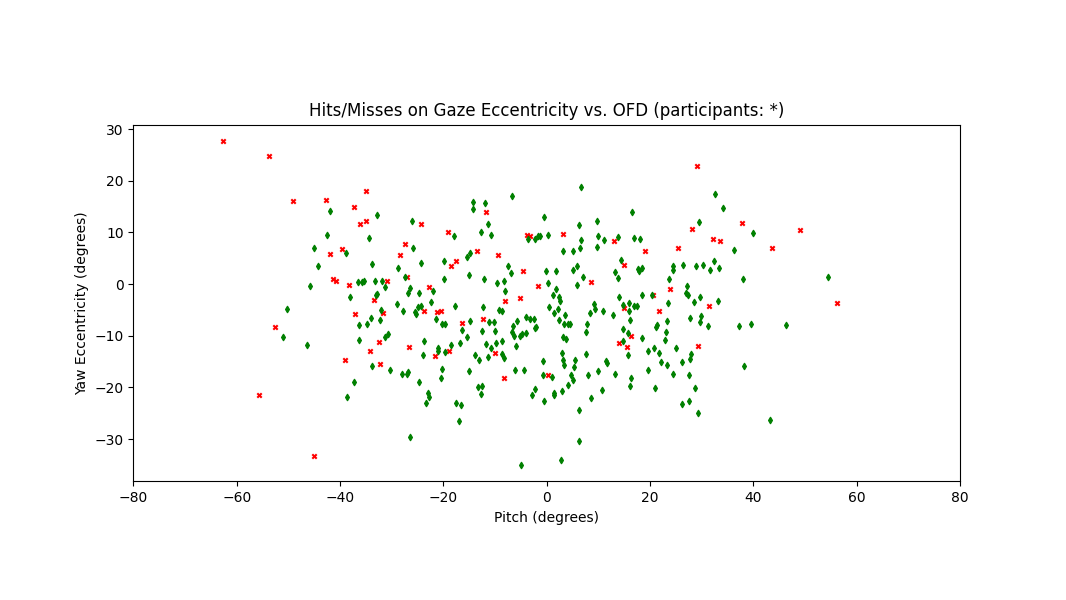

In [611]:
# pitch, yaw, OFD plotting
fig, ax = plt.subplots(figsize=(16/1.5,9/1.5))

cm1 = plt.cm.get_cmap('Reds')
cm2 = plt.cm.get_cmap('Greens')

shape = [u"X" if response else u"D" for response in responses] # response is inverted, response true means false
yawsV, pitchesV  =yaws[valid], pitches[valid]
responses=responses.astype('bool')
yawsMiss, pitchesMiss = yawsV[responses], pitchesV[responses] 
yawsHits, pitchesHits = yawsV[~responses], pitchesV[~responses]

sc1 = ax.scatter(yawsMiss, pitchesMiss, c='r', marker="x", s=10, cmap=cm1)
sc2 = ax.scatter(yawsHits, pitchesHits, c='g', marker="d", s=10, cmap=cm2)

# yawsMiss, pitchesMiss, OFDmiss = yawsV[responses], pitchesV[responses] , OFD[responses]
# yawsHits, pitchesHits, OFDhits = yawsV[~responses], pitchesV[~responses], OFD[~responses]

# sc1 = ax.scatter(yawsMiss, pitchesMiss, c=1-OFDmiss/OFD_max_filt, marker="x", s=10, cmap=cm1)
# sc2 = ax.scatter(yawsHits, pitchesHits, c=1-OFDhits/OFD_max_filt, marker="d", s=10, cmap=cm2)
# cbar1 = fig.colorbar(sc1, ticks=[1, 0])
# cbar1.ax.set_yticklabels([0, 2])
# cbar1.ax.set_ylim([0,1])
# cbar2 = fig.colorbar(sc2, ticks=[1, 0])
# cbar2.ax.set_yticklabels([0, 2])
# cbar2.ax.set_ylim([0,1])


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# ax.set_ylim(-20, 80)
ax.set_xlim(-80, 80)
ax.set_xlabel("Pitch (degrees)")
ax.set_ylabel("Yaw Eccentricity (degrees)")
ax.set_aspect('equal')
ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD (participants: {})".format(subject_name))
print( total_targets, hits, misses)

389 307 82


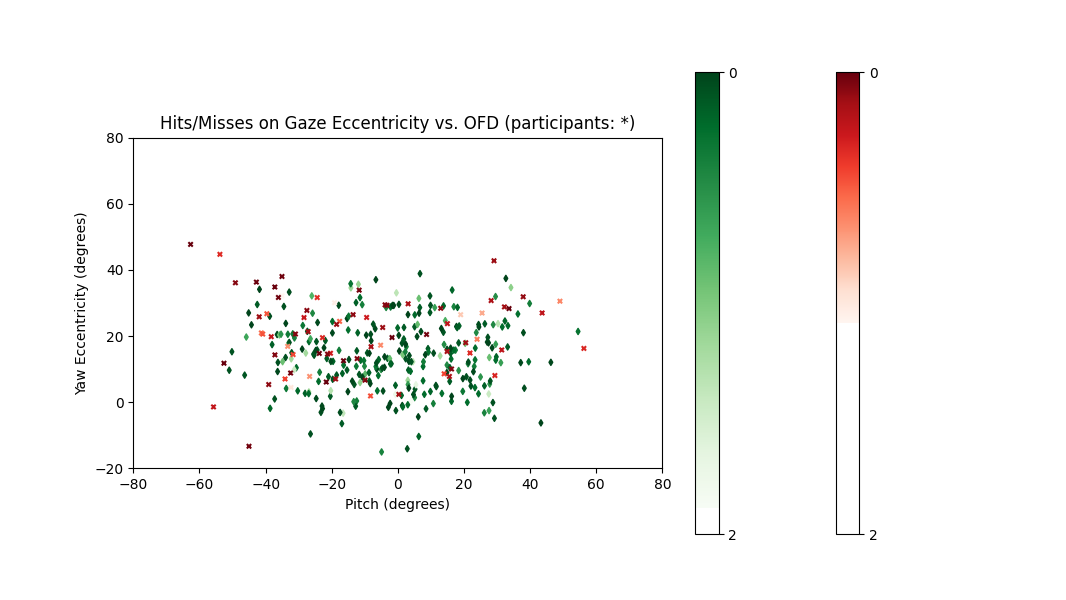

In [623]:
# pitch, yaw, OFD plotting
fig, ax = plt.subplots(figsize=(16/1.5,9/1.5))

cm1 = plt.cm.get_cmap('Reds')
cm2 = plt.cm.get_cmap('Greens')

shape = [u"X" if response else u"D" for response in responses] # response is inverted, response true means false
yawsV, pitchesV  =yaws[valid], pitches[valid]
responses=responses.astype('bool')
yawsMiss, pitchesMiss, OFDmiss = yawsV[responses], pitchesV[responses], OFD[responses]
yawsHits, pitchesHits, OFDhits = yawsV[~responses], pitchesV[~responses], OFD[~responses]

sc2 = ax.scatter(yawsHits, pitchesHits, c=1-OFDhits/OFD_max_filt, marker="d", s=10, cmap=cm2)
sc1 = ax.scatter(yawsMiss, pitchesMiss, c=1-OFDmiss/OFD_max_filt, marker="x", s=10, cmap=cm1)

cbar1 = fig.colorbar(sc1, ticks=[1, 0])
cbar1.ax.set_yticklabels([0, 2])
cbar1.ax.set_ylim([0,1])
cbar2 = fig.colorbar(sc2, ticks=[1, 0])
cbar2.ax.set_yticklabels([0, 2])
cbar2.ax.set_ylim([0,1])


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

ax.set_ylim(-20, 80)
ax.set_xlim(-80, 80)
ax.set_xlabel("Pitch (degrees)")
ax.set_ylabel("Yaw Eccentricity (degrees)")
ax.set_aspect('equal')
ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD (participants: {})".format(subject_name))
print( total_targets, hits, misses)

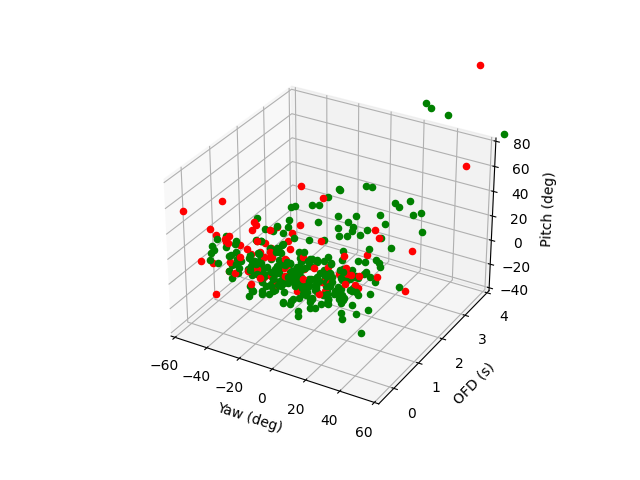

In [580]:
# 3d plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]*(180/np.pi)
        yaw = graph_data_tuples[num_entries*i+4]*(180/np.pi)        

        ax.scatter(yaw, OFD, pitch, c='r' if response else 'g')

ax.set_xlabel('Yaw (deg)')
ax.set_xlim(-60, 60)
ax.set_ylabel('OFD (s)')
ax.set_ylim(-0.5, 4)
ax.set_zlabel('Pitch (deg)')
ax.set_zlim(-40, 80)

ax.set_aspect('auto')
# ax.set_xlim(-1, 80)


plt.show()

In [618]:
# construct np data
yaws = np.array([])
pitches = np.array([])
OFDs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFDs = np.append(OFDs, graph_data_tuples[num_entries*i])
        eccs = np.append(eccs, graph_data_tuples[num_entries*i+1])
        responses_original = np.append(responses_original, graph_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, graph_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, graph_data_tuples[num_entries*i+4]*(180/np.pi))
  

In [620]:
# filter the data to remove outliers
eccs2 = np.linalg.norm([(pitches-20)*2.6, yaws], axis=0)
eccOFD = np.vstack([OFDs, eccs2]).T
time_idcs = eccOFD[:, 0] < 5
ecc_idcs = eccOFD[:, 1] < 100
valid = time_idcs * ecc_idcs
eccOFD = eccOFD[valid,:]
responses = responses_original[valid]

In [368]:
# discretized map
# x, y, z = eccOFD[:,0], eccOFD[:,1], 1-responses

# Bin the data onto a 10x10 grid
# Have to reverse x & y due to row-first indexing
# zi, yi, xi = np.histogram2d(y, x, bins=(15,15), weights=z, normed=False)
# counts, _, _ = np.histogram2d(y, x, bins=(15,15))

# zi = zi / counts
# zi = np.ma.masked_equal(zi, 0)

# fig, ax = plt.subplots()
# ax.pcolormesh(xi, yi, zi, edgecolors='black')
# scat = ax.scatter(x, y, c=z, s=1)
# colorbar = fig.colorbar(scat)
# ax.margins(0.05)

# plt.show()

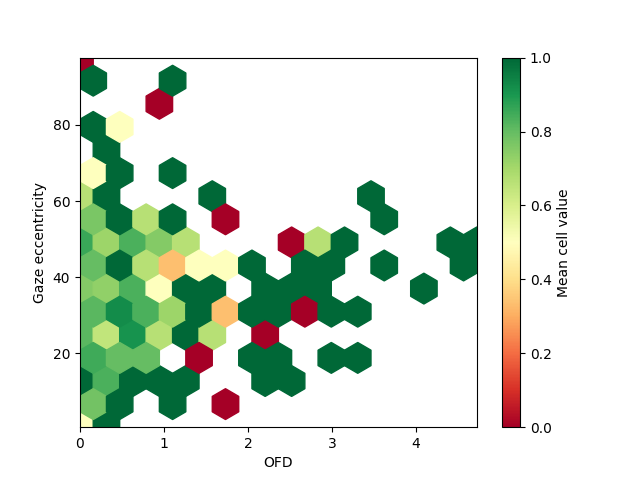

In [621]:
from matplotlib import cm 
from matplotlib import mlab as ml
plt.figure()
x, y, z = eccOFD[:,0], eccOFD[:,1], 1-responses
plt.hexbin(x, y, C=z, gridsize=(15), cmap=cm.RdYlGn, bins=None, reduce_C_function=np.mean)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('Mean cell value')
plt.ylabel('Gaze eccentricity')
plt.xlabel('OFD')
plt.show()   

## OFD SVM analysis

C:\Users\Abhijat\AppData\Local\Temp/ipykernel_12308/760331777.py:31: UserWarning: No contour levels were found within the data range.
  a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])


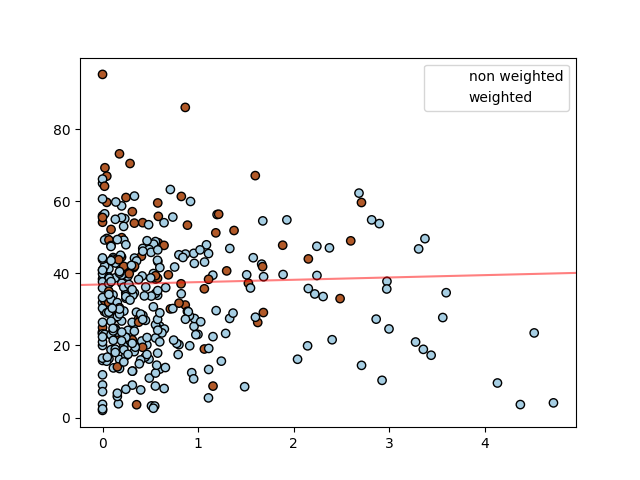

In [569]:
#linear svm
from sklearn import svm

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(eccOFD, responses)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight='balanced')
wclf.fit(eccOFD, responses)

plt.figure()
# plot the samples
plt.scatter(eccOFD[:, 0], eccOFD[:, 1], c=responses, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

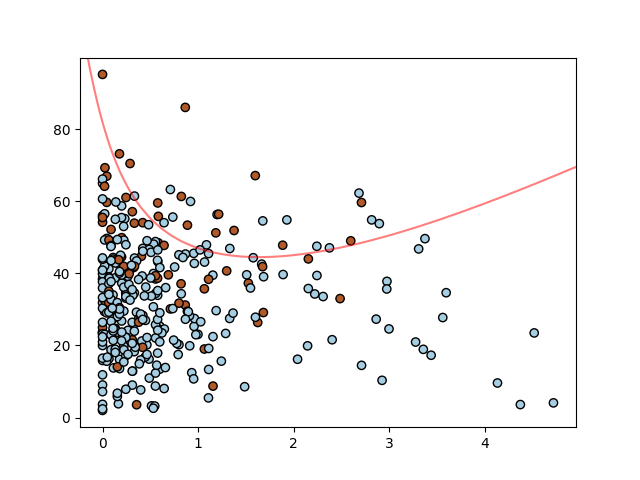

In [579]:
from sklearn import svm

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.NuSVC(kernel='poly', gamma='scale', nu=0.35, degree=3, class_weight='balanced')
# wclf = svm.NuSVC(kernel='sigmoid', gamma='scale', nu=0.4, class_weight={0:1, 1:40})
wclf.fit(eccOFD, responses)

plt.figure()
# plot the samples
plt.scatter(eccOFD[:, 0], eccOFD[:, 1], c=responses, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

# plt.legend(
#     [a.collections[0], b.collections[0]],
#     ["non weighted", "weighted"],
#     loc="upper right",
# )
plt.show()

## Selected participant data

In [11]:
# insert subject name here:
subject_name="tab*"

In [12]:
if bIgnoreLeadingMisses:
    graph_data_files = glob.glob('temp_data/no_leading_misses/'+subject_name+'*OFDvEcc.*')
else:
    graph_data_files = glob.glob('temp_data/all_leading_misses/'+subject_name+'*OFDvEcc.*')

427 337 90


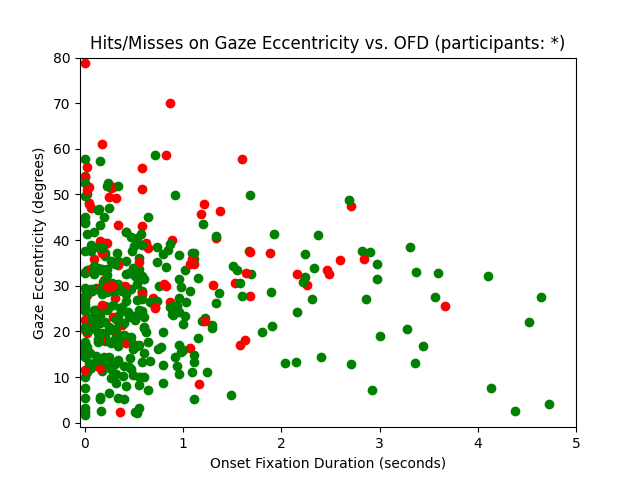

In [197]:
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, eccentricity, c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 5)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD (participants: {})".format(subject_name))
print( total_targets, hits, misses)

# OSA analysis

In [595]:
# insert subject name here:
subject_name="*"
if bIgnoreLeadingMisses:
    graph_data_files = glob.glob('temp_data/no_leading_misses/OSA/'+subject_name+'*OSAvEcc.*')
else:
    graph_data_files = glob.glob('temp_data/all_leading_misses/OSA/'+subject_name+'*OSAvEcc.*')

In [596]:
# construct np data
yaws = np.array([])
pitches = np.array([])
OSAs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OSAs = np.append(OSAs, graph_data_tuples[num_entries*i])
        eccs = np.append(eccs, graph_data_tuples[num_entries*i+1])
        responses_original = np.append(responses_original, graph_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, graph_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, graph_data_tuples[num_entries*i+4]*(180/np.pi))

# filter the data to remove outliers
eccOSA = np.vstack([OSAs, eccs]).T
OSA_max_filt = 40
ecc_max_filt = 80
time_idcs = eccOSA[:, 0] < OSA_max_filt
ecc_idcs = eccOSA[:, 1] < ecc_max_filt
valid = time_idcs * ecc_idcs
eccOSA = eccOSA[valid,:]
responses = responses_original[valid]  

331 total stims, 261 hits, 70 misses


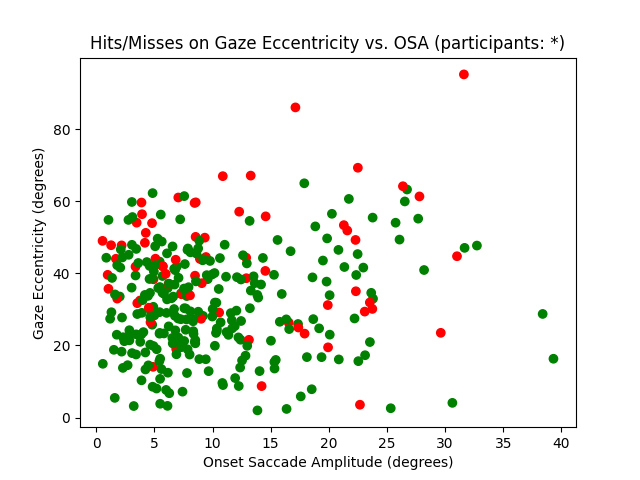

In [597]:
fig, ax = plt.subplots()

OSA = eccOSA[:,0]
eccentricity =  eccOFD[:,1]
ecc2 = np.linalg.norm([(pitches-20)*2.5, yaws], axis=0)[valid]
color = ['r' if response else 'g' for response in responses]
ax.scatter(OSA, ecc2, c=color)

ax.set_xlabel("Onset Saccade Amplitude (degrees)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OSA (participants: {})".format(subject_name))
print("{:.0f} total stims, {:.0f} hits, {:.0f} misses".format(responses.shape[0],responses.shape[0] - np.sum(responses), np.sum(responses)))

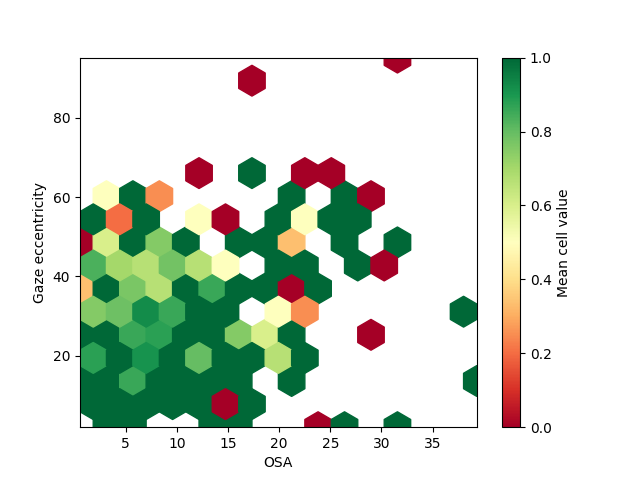

In [598]:
from matplotlib import cm 
from matplotlib import mlab as ml
x = OSA
y = ecc2
z = 1-responses

plt.figure()
plt.hexbin(x, y, C=z, gridsize=(15), cmap=cm.RdYlGn, bins=None, reduce_C_function=np.mean)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('Mean cell value')
plt.ylabel('Gaze eccentricity')
plt.xlabel('OSA')
plt.show()   

C:\Users\Abhijat\AppData\Local\Temp/ipykernel_12308/2536376065.py:31: UserWarning: No contour levels were found within the data range.
  a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])


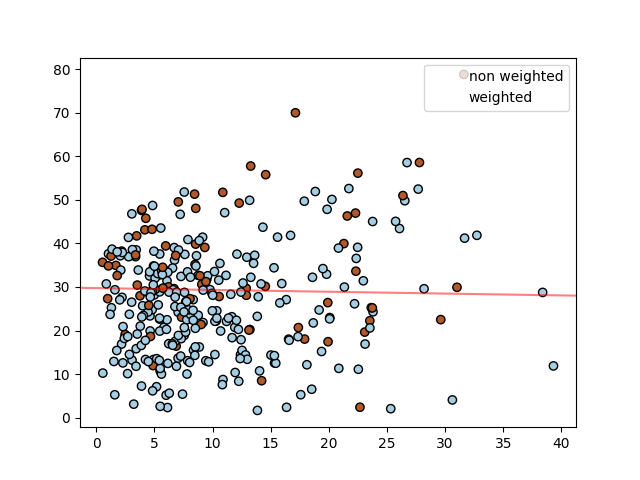

In [599]:
# SVM on OSA data
from sklearn import svm

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(eccOSA, responses)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 4})
wclf.fit(eccOSA, responses)

plt.figure()
# plot the samples
plt.scatter(eccOSA[:, 0], eccOSA[:, 1], c=responses, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

In [602]:
# SVM on OSA data
from sklearn import svm

# fit the model and get the separating hyperplane
# clf = svm.SVC(kernel="linear", C=1.0)
# clf.fit(eccOSA, responses)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.NuSVC(kernel='poly', gamma='scale', nu=0.2, class_weight='balanced', degree=5)
# wclf = svm.NuSVC(kernel='sigmoid', gamma='scale', nu=0.1, class_weight={1: 4}, degree=4)
wclf.fit(eccOSA, responses)

plt.figure()
# plot the samples
plt.scatter(eccOSA[:, 0], eccOSA[:, 1], c=responses, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

# plt.legend(
#     [a.collections[0], b.collections[0]],
#     ["non weighted", "weighted"],
#     loc="upper right",
# )
plt.show()

KeyboardInterrupt: 

# OFD + OSA analysis

In [625]:
# insert subject name here:
subject_name="*"
if bIgnoreLeadingMisses:
    OSA_data_files = glob.glob('temp_data/no_leading_misses/OSA/'+subject_name+'*OSAvEcc.*')
    OFD_data_files = glob.glob('temp_data/no_leading_misses/OFD/'+subject_name+'*OFDvEcc.*')
else:
    OSA_data_files = glob.glob('temp_data/all_leading_misses/OSA/'+subject_name+'*OSAvEcc.*')
    OFD_data_files = glob.glob('temp_data/all_leading_misses/OFD/'+subject_name+'*OFDAvEcc.*')

In [634]:
import os
intersection_data_files = []
for file in OSA_data_files:
    subject_id_stub = os.path.basename(file).strip("_OSAvEcc.pkl")
    for file in OFD_data_files:
        if subject_id_stub in file:
            intersection_data_files += [subject_id_stub]

OFDOSAfiles = []
for file in intersection_data_files:
    OSA_file = glob.glob('temp_data/no_leading_misses/OSA/'+file+'*')[0]
    OFD_file = glob.glob('temp_data/no_leading_misses/OFD/'+file+'*')[0]
    OFDOSAfiles += [(OFD_file, OSA_file)]

In [676]:
# construct np data with both OFDs and OSAs
yaws = np.array([])
pitches = np.array([])
OSAs = np.array([])
OFDs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filenames in OFDOSAfiles:
    OFD_file, OSA_file = filenames
    with open(OFD_file, 'rb') as f:
        OFD_data_tuples = pkl.load(f)
    with open(OSA_file, 'rb') as f:
        OSA_data_tuples = pkl.load(f)        
    num_entries = 5
    # if (len(OSA_data_tuples) != len(OFD_data_tuples)):
    #     print(OFD_file, len(OFD_data_tuples), len(OSA_data_tuples)) # always more OFD tuples??
    # continue
    graph_data_num = min(len(OSA_data_tuples),  len(OFD_data_tuples))
    j=0
    for i in range(int(len(OSA_data_tuples)/num_entries)):
        while not np.allclose(OFD_data_tuples[num_entries*j+1], OSA_data_tuples[num_entries*i+1]):
            j+=1       
        OSAs = np.append(OSAs, OSA_data_tuples[num_entries*i])
        OFDs = np.append(OFDs, OFD_data_tuples[num_entries*j])
        eccs = np.append(eccs, OFD_data_tuples[num_entries*i+1])
        assert( np.allclose(OSA_data_tuples[num_entries*i+3], OFD_data_tuples[num_entries*j+3]))
        assert( np.allclose(OSA_data_tuples[num_entries*i+4], OFD_data_tuples[num_entries*j+4]))
        responses_original = np.append(responses_original, OSA_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, OSA_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, OSA_data_tuples[num_entries*i+4]*(180/np.pi))
        
# filter the data to remove outliers
OFDOSAecc = np.vstack([OFDs, OSAs, eccs]).T
OFD_max_filt = 0.25
OSA_max_filt = 50
ecc_max_filt = 100
time_idcs = OFDOSAecc[:, 0] < OFD_max_filt
sa_idcs = OFDOSAecc[:, 1] < OSA_max_filt
ecc_idcs = OFDOSAecc[:, 2] < ecc_max_filt
valid = time_idcs * ecc_idcs * sa_idcs
OFDOSAecc_filtered = OFDOSAecc[valid,:]
responses_filtered = responses_original[valid]  

358 total stims, 283 hits, 75 misses


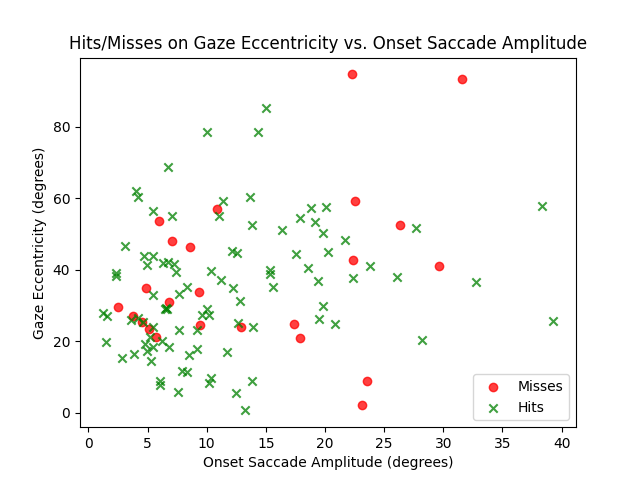

In [677]:
fig, ax = plt.subplots()

OFD = OFDOSAecc_filtered[:,0]
OSA = OFDOSAecc_filtered[:,1]
eccentricity = OFDOSAecc_filtered[:,2]

ecc2 = np.linalg.norm([(pitches-20)*2.5, yaws], axis=0)[valid]
color = ['r' if response else 'g' for response in responses_filtered]
shape = ['o' if response else 'x' for response in responses_filtered]
misses = responses_filtered.astype(bool)

ax.scatter(OSA[misses], ecc2[misses], c='r', marker='o', alpha=0.75, label='Misses')
ax.scatter(OSA[~misses], ecc2[~misses], c='g', marker='x', alpha=0.75, label='Hits')


ax.set_xlabel("Onset Saccade Amplitude (degrees)")
ax.set_ylabel("Gaze Eccentricity (degrees)")

ax.legend(loc='lower right')

# ax.set_title("Hits/Misses on Gaze eccentricity vs. Onset Saccade Amplitude (participants: {})".format(subject_name))
ax.set_title("Hits/Misses on Gaze Eccentricity vs. Onset Saccade Amplitude")
print("{:.0f} total stims, {:.0f} hits, {:.0f} misses".format(responses.shape[0],responses.shape[0] - np.sum(responses), np.sum(responses)))

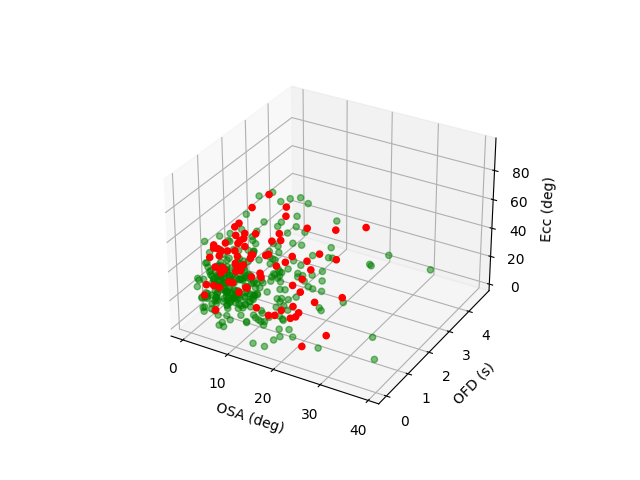

In [315]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

miss_idcs = responses_filtered.astype(bool)

# ax.scatter(OSA, OFD, ecc2, c=color, alpha=0.2)
ax.scatter(OSA[miss_idcs], OFD[miss_idcs], ecc2[miss_idcs], c='r', alpha=1)
ax.scatter(OSA[~miss_idcs], OFD[~miss_idcs], ecc2[~miss_idcs], c='g', alpha=0.5)

ax.set_xlabel('OSA (deg)')
# ax.set_xlim(-60, 60)
ax.set_ylabel('OFD (s)')
# ax.set_ylim(-0.5, 4)
ax.set_zlabel('Ecc (deg)')
# ax.set_zlim(-40, 80)

ax.set_aspect('auto')
# ax.set_xlim(-1, 80)


plt.show()

In [334]:
# 3d histogram?
miss_H, edges = np.histogramdd(OFDOSAecc_filtered[miss_idcs], bins=10)
hits_H, edges = np.histogramdd(OFDOSAecc_filtered[~miss_idcs], bins=10)

In [335]:
prob3D = miss_H/(miss_H+hits_H+1E-10)

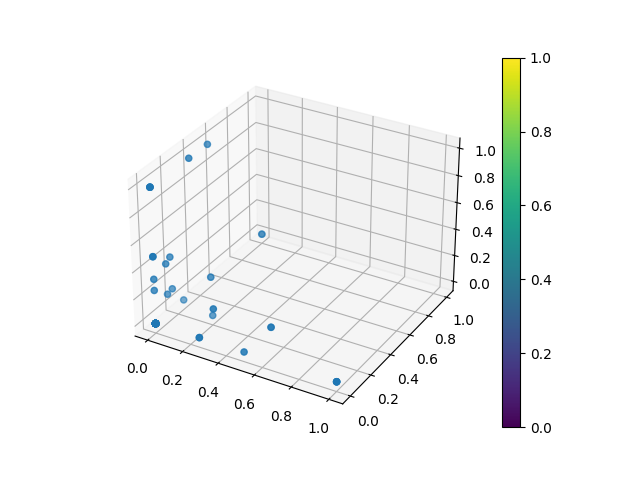

In [337]:
# make a meshgrid with edges and plot the values at the center of the thing
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

miss_idcs = responses_filtered.astype(bool)

scattering = ax.scatter(prob3D[:,0], prob3D[:,1], prob3D[:,2])
fig.colorbar(scattering)
# ax.scatter(OSA[miss_idcs], OFD[miss_idcs], ecc2[miss_idcs], c='r', alpha=1)
# ax.scatter(OSA[~miss_idcs], OFD[~miss_idcs], ecc2[~miss_idcs], c='g', alpha=0.5)

# ax.set_xlabel('OSA (deg)')
# # ax.set_xlim(-60, 60)
# ax.set_ylabel('OFD (s)')
# # ax.set_ylim(-0.5, 4)
# ax.set_zlabel('Ecc (deg)')
# ax.set_zlim(-40, 80)

ax.set_aspect('auto')
# ax.set_xlim(-1, 80)


plt.show()